In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import metrics
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

Human resource dataset with the following variables;satisfaction_level,last_evaluation,average_montly_hours,number_project,time_spend_company
Work_accident,turnover,promotion_last_5years,department and salary.

With objective of determining salary category (low, medium, high) base on some of the above attributes.

In [9]:
data = pd.read_csv("Excel.csv")
data = data.rename(columns={'left': 'turnover','sales': 'department'})
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
new_data= data.drop(columns=['promotion_last_5years', 'turnover','Work_accident','department','last_evaluation'])
new_data.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,salary
0,0.38,2,157,3,low
1,0.80,5,262,6,medium
2,0.11,7,272,4,medium
3,0.72,5,223,5,low
4,0.37,2,159,3,low


Text(0.5,1,'Correlation between different fearures')

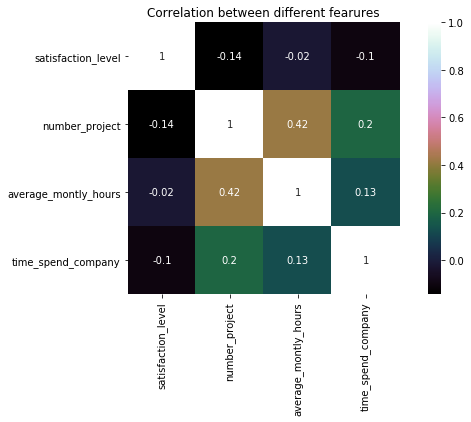

In [11]:
correlation = new_data.corr()
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')

In [12]:
#No visibly strong correlation with any of the fields above

In [13]:
data.groupby("salary")["salary"].nunique()

salary
high      1
low       1
medium    1
Name: salary, dtype: int64

In [ ]:
new_data.groupby("salary")["salary"].nunique()
#0-high, 1-low, 2-medium salary

In [16]:
dept= pd.crosstab(data.department,data.salary)
dept

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


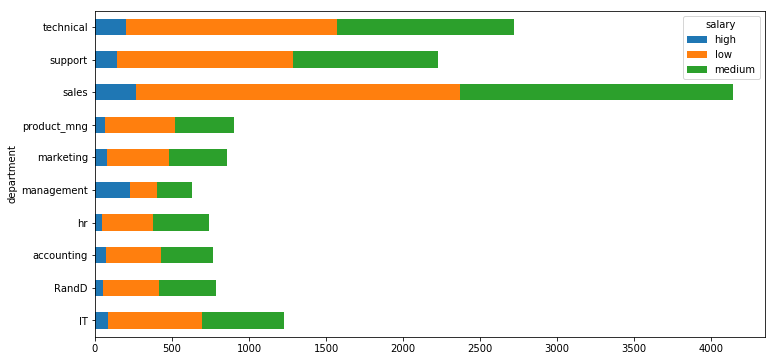

In [17]:
fig, ax = plt.subplots(figsize = (12,6))
pd.crosstab(data.department,data.salary).plot(kind='barh',ax=ax, stacked=True)

In [18]:
#Sales has more employees as there is greater range in high, low and medium salary catagory
#unfortunately of those making high salary human resource worker have few

In [19]:
number_project = pd.crosstab(data.number_project,new_data.salary)
number_project

salary,high,low,medium
number_project,,,
2,140,1344,904
3,408,1791,1856
4,368,2087,1910
5,245,1317,1199
6,73,633,468
7,3,144,109


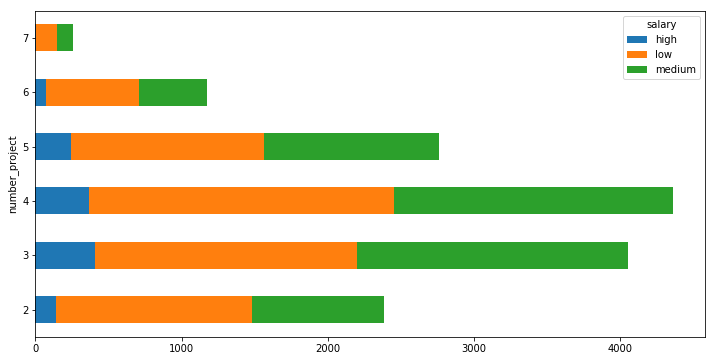

In [20]:
fig, ax = plt.subplots(figsize = (12,6))
pd.crosstab(data.number_project,data.salary).plot(kind='barh',ax=ax, stacked=True)

In [21]:
#Employees working 3-4 projects tend to be in the category with higher salary

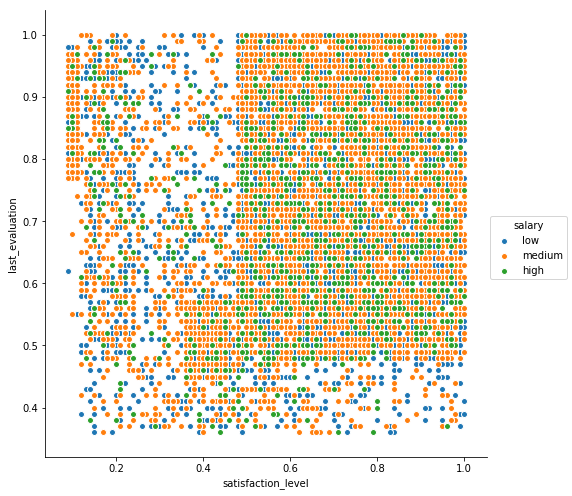

In [22]:
sns.pairplot(x_vars=["satisfaction_level"], y_vars=["last_evaluation"], data=data, hue="salary", size=7)
plt.rcParams['axes.facecolor'] = 'white'

In [23]:
#most of employees with high productivity and satisfaction level high medium level salary in this particular case

In [24]:
dept_count = data.groupby('department')['salary'].count()
dept_count

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

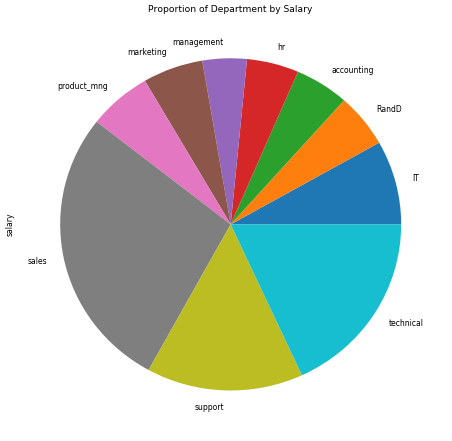

In [25]:
fig = plt.figure(figsize=(10,10), dpi=55)
ax = plt.subplot(111)
dept_count.plot(kind='pie',title='Proportion of Department by Salary', legend=False)

In [26]:
#Most employees work in sales department with management

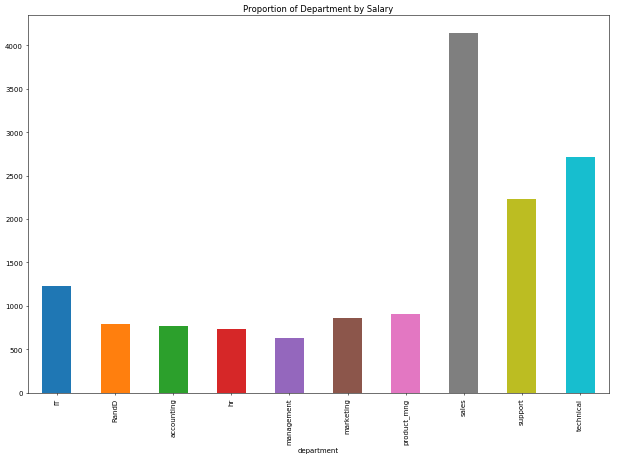

In [27]:
fig = plt.figure(figsize=(15,10), dpi=50)
ax = plt.subplot(111)
dept_count.plot(kind='bar',title='Proportion of Department by Salary', legend=False)

In [28]:
data1 = new_data
labelencoder = LabelEncoder()
for col in data1.columns:
    data1[col] = labelencoder.fit_transform(data[col])
data1.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,salary
0,29,0,61,1,1
1,71,3,166,4,2
2,2,5,176,2,2
3,63,3,127,3,1
4,28,0,63,1,1


# Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()

In [30]:
X = data1.iloc[:,1:4]
y = data1.iloc[:, 4]
y.head()

0    1
1    2
2    2
3    1
4    1
Name: salary, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [32]:
model_naive.fit(X_train,y_train)

GaussianNB(priors=None)

In [33]:
pred = model_naive.predict(X_test)

In [34]:
metrics.accuracy_score(y_test, pred)

0.5003333333333333

In [35]:
metrics.confusion_matrix(y_test,pred, labels =[0,1,2])

array([[  18,  177,   24],
       [  14, 1326,  177],
       [  32, 1075,  157]])

In [36]:
print(metrics.classification_report(y_test,pred,target_names =['high', 'low','medium']))

             precision    recall  f1-score   support

       high       0.28      0.08      0.13       219
        low       0.51      0.87      0.65      1517
     medium       0.44      0.12      0.19      1264

avg / total       0.47      0.50      0.42      3000



# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=5)

In [38]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
treePred = model_tree.predict(X_test)
treePred

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
metrics.accuracy_score(y_test, treePred)

0.5156666666666667

In [42]:
metrics.confusion_matrix(y_test,treePred,labels =[0,1,2])

array([[   2,  188,   29],
       [   5, 1453,   59],
       [   3, 1169,   92]])

In [43]:
print(metrics.classification_report(y_test,treePred,target_names =['high', 'low','medium']))

             precision    recall  f1-score   support

       high       0.20      0.01      0.02       219
        low       0.52      0.96      0.67      1517
     medium       0.51      0.07      0.13      1264

avg / total       0.49      0.52      0.39      3000



# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_RR = RandomForestClassifier(max_depth =5)

In [46]:
model_RR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
RRPred = model_RR.predict(X_test)

In [48]:
metrics.accuracy_score(y_test, RRPred)

0.5226666666666666

In [49]:
metrics.confusion_matrix(y_test,RRPred,labels =[0,1,2])

array([[   1,  166,   52],
       [   2, 1321,  194],
       [   0, 1018,  246]])

In [50]:
print(metrics.classification_report(y_test,RRPred,target_names =['high', 'low','medium']))

             precision    recall  f1-score   support

       high       0.33      0.00      0.01       219
        low       0.53      0.87      0.66      1517
     medium       0.50      0.19      0.28      1264

avg / total       0.50      0.52      0.45      3000



# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
from sklearn import metrics
y_pred_class = logreg.predict(X_test)
#print(metrics.accuracy_score(y_test, y_pred_class))

In [53]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1    1517
2    1264
0     219
Name: salary, dtype: int64

In [54]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[   0  195   24]
 [   0 1487   30]
 [   0 1199   65]]


# Overall how often is the classifier correct or incorrrect

In [55]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[   0  195   24]
 [   0 1487   30]
 [   0 1199   65]]


In [56]:
print((TP + TN) / float(TP + TN + FP + FN))

0.8840665873959572


88% of the time correct

In [57]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.1159334126040428


12% of the time incorrect

# Each against the other
high or low salary
high or medium salary
low or medium salary

In [76]:
data2 == data
data2["highdetect"] = np.where(data2.salary=="high", 0, 1)
data2['lowdetect'] = np.where(data2.salary=="low", 0, 1)
data2["mediumdetect"] = np.where(data2.salary=="medium", 0, 1)

In [77]:
data2.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,department,salary,highdetect,lowdetect,mediumdetect
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,0,1


In [90]:
labelencoder = LabelEncoder()
for col in data2.columns:
    data2[col] = labelencoder.fit_transform(data2[col])
 
data2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,department,salary,highdetect,lowdetect,mediumdetect
0,29,17,0,61,1,0,1,0,7,1,1,0,1
1,71,50,3,166,4,0,1,0,7,2,1,1,0
2,2,52,5,176,2,0,1,0,7,2,1,1,0
3,63,51,3,127,3,0,1,0,7,1,1,0,1
4,28,16,0,63,1,0,1,0,7,1,1,0,1


In [91]:
train, test = train_test_split(data2, test_size =.2)

In [ ]:
class GDLogisticRegression:
    """
   
    """
    def __init__(self, learn_rate=0.1):
        self.lr = learn_rate
        
    def predict(self,X):
        X_new_b = np.c_[np.ones((X.shape[0],1)),X]
        pp = X_new_b.dot(self.theta_best)
        logist = 1/(1+np.exp(-1*pp))
        return logist

    def score(self, X, y):
        return np.sum(np.square(self.predict(X)-y))
    
    def fit(self, X, y, n=1000):
        rows,cols = X.shape
        self.theta_best = np.random.rand(cols+1)
        self.scores = []
        res = self.predict(X)
        lastbase = 0
        for i in range(n):
            base = self.score(X, y)
            self.lr = self.lr / 1.005
            for i in range(len(self.theta_best)):
                savetb = self.theta_best[i]
                self.theta_best[i] = savetb + self.lr
                s1 = self.score(X, y)
                self.theta_best[i] = savetb - self.lr
                s2 = self.score(X, y)
                self.theta_best[i] = savetb
                #print(base, s1, s2)
                if s1 < base and s1 < s2:
                    self.theta_best[i] = savetb + self.lr
                    base = s1
                elif s2 < base and s2 <= s1:
                    self.theta_best[i] = savetb - self.lr
                    base = s2
                lastbase = base
            self.scores.append(base)

In [133]:
lr = GDLogisticRegression(0.1)

In [134]:
lr.fit(train.iloc[:, :9], train.iloc[:, 10], n=120)

In [135]:
preds=lr.predict(test.iloc[:, :9])

In [136]:
highdetect = [1 if x > 0.5 else 0 for x in preds]

In [137]:
metrics.accuracy_score(test.iloc[:, 10], highdetect)

0.921

Higher accuracy score for high vs low detection

In [138]:
metrics.confusion_matrix(test.iloc[:, 10],   highdetect, labels=[0,1,2])

array([[   0,  237,    0],
       [   0, 2763,    0],
       [   0,    0,    0]])

In [139]:
print(classification_report(test.iloc[:, 10], highdetect, target_names=['high','low']))

             precision    recall  f1-score   support

       high       0.00      0.00      0.00       237
        low       0.92      1.00      0.96      2763

avg / total       0.85      0.92      0.88      3000



/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [140]:
lr = GDLogisticRegression(0.1)

In [119]:
lr.fit(train.iloc[:, :9], train.iloc[:, 11], n=120)

In [120]:
preds=lr.predict(test.iloc[:, :9])

In [121]:
lowdetect = [1 if x > 0.5 else 0 for x in preds]

In [122]:
metrics.accuracy_score(test.iloc[:, 11], lowdetect)

0.5186666666666667

Average detection between high and medium

In [123]:
metrics.confusion_matrix(test.iloc[:, 11],  lowdetect, labels=[0,1,2])

array([[755, 715,   0],
       [729, 801,   0],
       [  0,   0,   0]])

In [132]:
print(classification_report(test.iloc[:, 11], lowdetect, target_names=['high','medium']))

             precision    recall  f1-score   support

       high       0.51      0.51      0.51      1470
     medium       0.53      0.52      0.53      1530

avg / total       0.52      0.52      0.52      3000



In [125]:
lr = GDLogisticRegression(0.1)

In [126]:
lr.fit(train.iloc[:, :9], train.iloc[:, 12], n=120)

In [127]:
preds=lr.predict(test.iloc[:, :9])

In [128]:
mediumdetect = [1 if x > 0.5 else 0 for x in preds]

In [129]:
metrics.accuracy_score(test.iloc[:, 12], mediumdetect)

0.56

Average detection between low and medium

In [130]:
metrics.confusion_matrix(test.iloc[:, 12],  mediumdetect, labels=[0,1,2])

array([[ 212, 1081,    0],
       [ 239, 1468,    0],
       [   0,    0,    0]])

In [141]:
print(classification_report(test.iloc[:, 12], mediumdetect, target_names=['low','medium']))

             precision    recall  f1-score   support

        low       0.47      0.16      0.24      1293
     medium       0.58      0.86      0.69      1707

avg / total       0.53      0.56      0.50      3000

